# WeatherPy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [35]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


In [36]:
# Import API key
from api_keys import geoapify_key
import json

# Empty list for holding the country names
countries = []

for i, city in enumerate(cities):
    # Target city
    target_city = city

    # Build the endpoint URL
    target_url = f"https://api.geoapify.com/v1/geocode/search?text={target_city}&format=json&apiKey={geoapify_key}"

    # Run a request to endpoint and convert result to json
    geo_data = requests.get(target_url).json()

    # Get actual latitude and longitude values of the city
    try:
        lat_act = geo_data['results'][0]['bbox']['lat1']
        lng_act = geo_data['results'][0]['bbox']['lon1']
        countries_act = geo_data['results'][0]['country']
    except (KeyError, IndexError):
        # If no coordinates are found, keep original coordinates.
        lat_act = lats[i]
        lng_act = lngs[i]
        countries_act = 'Not Found'

    # Update latitude and longitude
    lats[i] = lat_act
    lngs[i] = lng_act
    countries.append(countries_act)

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + '&lat=' + str(lats[i]) + '&lon=' + str(lngs[i]) + '&appid=' + weather_api_key

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        #city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          #"Country": country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ust-nera
Processing Record 2 of Set 1 | iskateley
Processing Record 3 of Set 1 | plunge
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | matoury
Processing Record 6 of Set 1 | mount isa
Processing Record 7 of Set 1 | nova vicosa
Processing Record 8 of Set 1 | cole harbour
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | isla mujeres
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | kuta
Processing Record 14 of Set 1 | las heras
Processing Record 15 of Set 1 | college
Processing Record 16 of Set 1 | vilyuchinsk
Processing Record 17 of Set 1 | kingston
Processing Record 18 of Set 1 | tura
Processing Record 19 of Set 1 | codrington
Processing Record 20 of Set 1 | puerto madryn
Processing Record 21 of Set 1 | utrik
Processing Record 22 of Set 1 | blackmans bay
Processing Reco

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df['Country'] = countries

# Show Record Count
city_data_df.count()

City          604
Lat           604
Lng           604
Max Temp      604
Humidity      604
Cloudiness    604
Wind Speed    604
Date          604
Country       604
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
0,ust-nera,64.5431,143.1150,288.29,55,29,2.60,1720403376,Russia
1,iskateley,67.6514,53.0783,290.42,62,22,3.90,1720403379,Russia
2,plunge,55.8955,21.8015,283.46,87,92,1.29,1720403381,Lithuania
3,port-aux-francais,-49.3649,70.2099,275.45,83,90,13.16,1720403384,France
4,matoury,4.7382,-52.4119,297.92,100,0,0.51,1720403386,France


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
City_ID,,,,,,,,,
0,ust-nera,64.5431,143.1150,288.29,55,29,2.60,1720403376,Russia
1,iskateley,67.6514,53.0783,290.42,62,22,3.90,1720403379,Russia
2,plunge,55.8955,21.8015,283.46,87,92,1.29,1720403381,Lithuania
3,port-aux-francais,-49.3649,70.2099,275.45,83,90,13.16,1720403384,France
4,matoury,4.7382,-52.4119,297.92,100,0,0.51,1720403386,France


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature¶

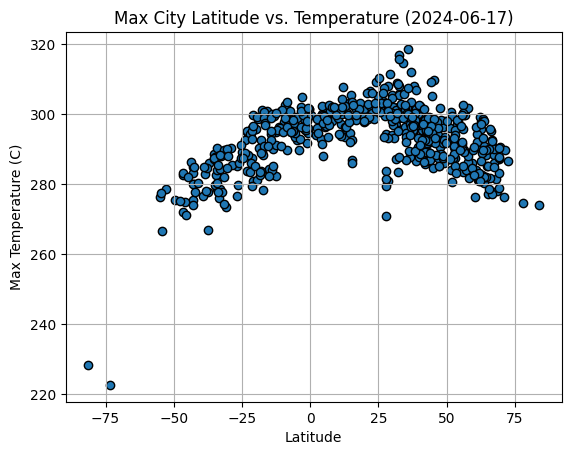

In [4]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x='Lat',y='Max Temp', kind='scatter', grid=True,
                  xlabel='Latitude', ylabel='Max Temperature (C)', title='Max City Latitude vs. Temperature (2024-06-17)')

# Incorporate the other graph properties
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Max Temp'],edgecolors='black')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

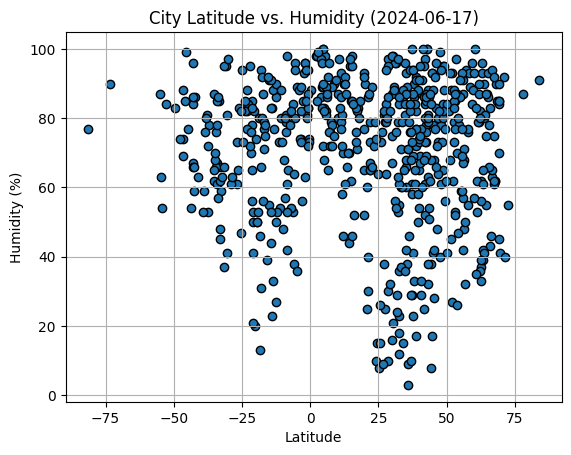

In [5]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x='Lat',y='Humidity', kind='scatter', grid=True,
                  xlabel='Latitude', ylabel='Humidity (%)', title='City Latitude vs. Humidity (2024-06-17)')

# Incorporate the other graph properties
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Humidity'],edgecolors='black')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

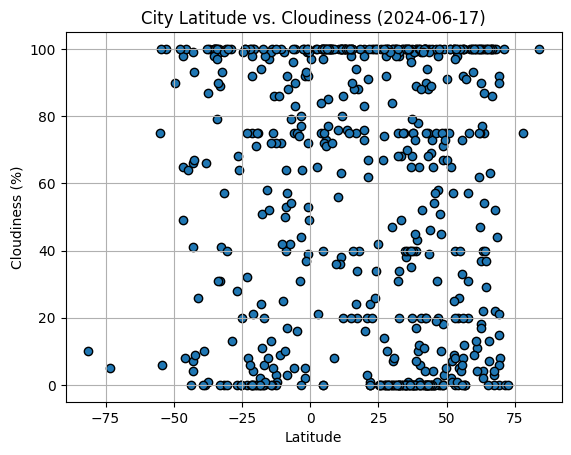

In [6]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x='Lat',y='Cloudiness', kind='scatter', grid=True,
                  xlabel='Latitude', ylabel='Cloudiness (%)', title='City Latitude vs. Cloudiness (2024-06-17)')

# Incorporate the other graph properties
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Cloudiness'],edgecolors='black')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

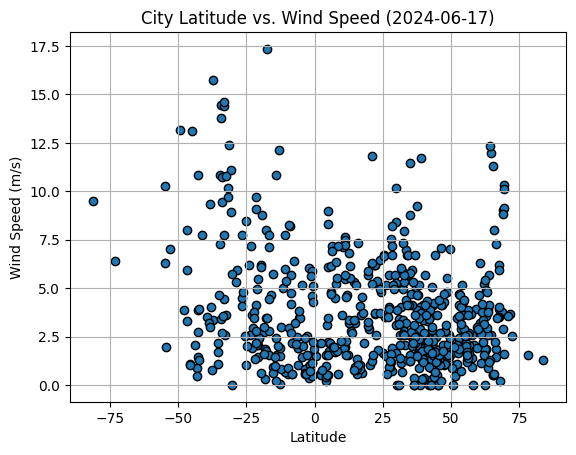

In [7]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x='Lat',y='Wind Speed', kind='scatter', grid=True,
                  xlabel='Latitude', ylabel='Wind Speed (m/s)', title='City Latitude vs. Wind Speed (2024-06-17)')

# Incorporate the other graph properties
plt.scatter(x=city_data_df['Lat'],y=city_data_df['Wind Speed'],edgecolors='black')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_reg_plot(x, y, xlabel, ylabel, title):
    (slope, intercept, r, p, std_err) = linregress(x, y)

    reg_values = slope * x + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot for linear regression overlay
    plt.scatter(x, y)
    plt.plot(x, reg_values, "r-")
    
    # Incorporate the other graph properties
    plt.annotate(line_eq, (x.min(),y.min()), fontsize=8, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    print(f"The r-squared is: {r**2}")

    # Print plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
City_ID,,,,,,,,,
0,ust-nera,64.5431,143.1150,288.29,55,29,2.60,1720403376,Russia
1,iskateley,67.6514,53.0783,290.42,62,22,3.90,1720403379,Russia
2,plunge,55.8955,21.8015,283.46,87,92,1.29,1720403381,Lithuania
4,matoury,4.7382,-52.4119,297.92,100,0,0.51,1720403386,France
7,cole harbour,44.6338,-63.5052,294.41,93,73,1.74,1720403394,Canada


In [10]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date,Country
City_ID,,,,,,,,,
3,port-aux-francais,-49.3649,70.2099,275.45,83,90,13.16,1720403384,France
5,mount isa,-20.8890,139.3332,299.70,41,4,2.08,1720403389,Australia
6,nova vicosa,-18.0010,-40.0675,292.78,94,24,1.83,1720403391,Brazil
8,papatowai,-46.5819,169.4508,282.61,74,65,5.96,1720403396,New Zealand
9,puerto natales,-52.8426,-75.7225,278.77,84,100,7.00,1720403399,Chile


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.2827375292060269


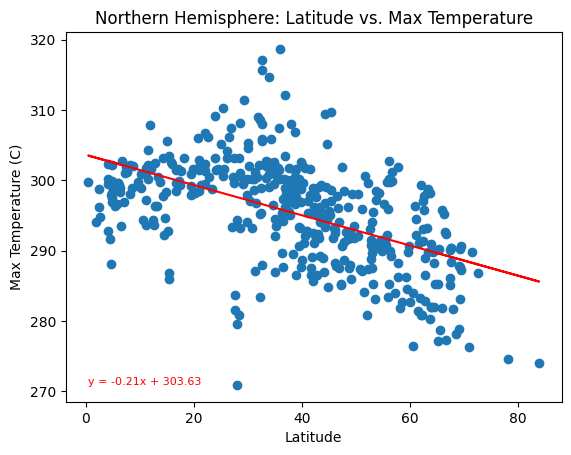

In [11]:
# Linear regression on Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (C)', 'Northern Hemisphere: Latitude vs. Max Temperature')

The r-squared is: 0.6549787103259396


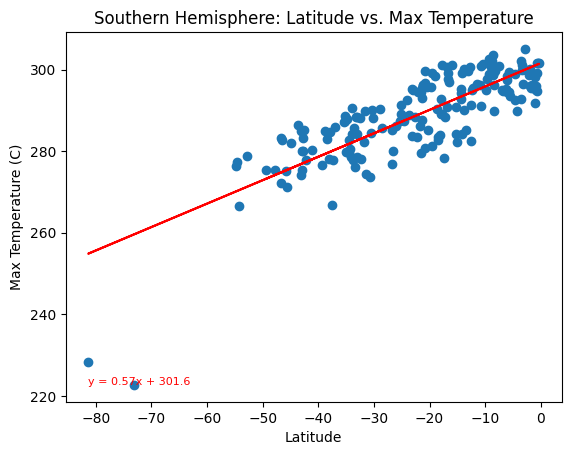

In [12]:
# Linear regression on Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (C)', 'Southern Hemisphere: Latitude vs. Max Temperature')

**Discussion about the linear relationship:** The linear relationship between temperature and latitude shows that the further you are from the equator, the lower the max temperature. The Northern Hemisphere linear regression line only interprets 28% of the variation in temperature. The Southern Hemisphere linear regression line interprets 65% of the variation in temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.008966676909896436


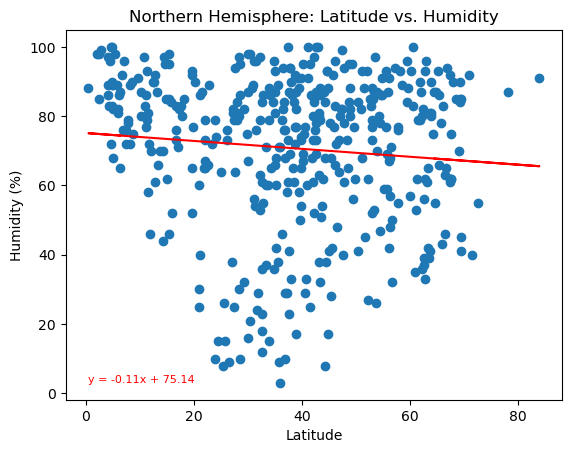

In [27]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Northern Hemisphere: Latitude vs. Humidity')

The r-squared is: 1.5454033502147785e-06


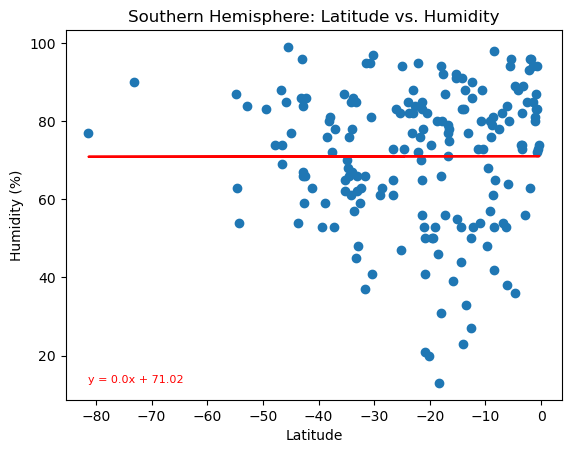

In [28]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Southern Hemisphere: Latitude vs. Humidity')

**Discussion about the linear relationship:** The linear relationship between latitude and humidity is quite weak. Latitiude doesn't seem to be a good indicator of humidity based on the low r-squared values. It can also be seen on the scatter plot that the points are not centered or close to the regression lines.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.032895395955683554


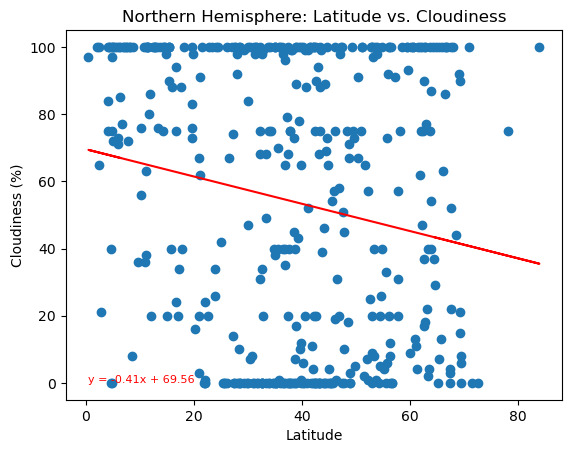

In [29]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Northern Hemisphere: Latitude vs. Cloudiness')

The r-squared is: 0.00020405579769837144


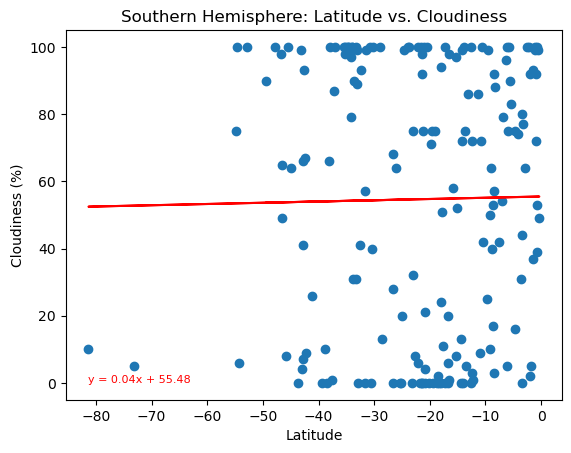

In [30]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Southern Hemisphere: Latitude vs. Cloudiness')

**Discussion about the linear relationship:** The linear relationship between latitude and cloudiness is quite weak. Latitiude doesn't seem to be a good indicator of how cloudy it is based on the low r-squared values. It can also be seen on the scatter plot that the points are not centered or close to the regression lines.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.001384101794917722


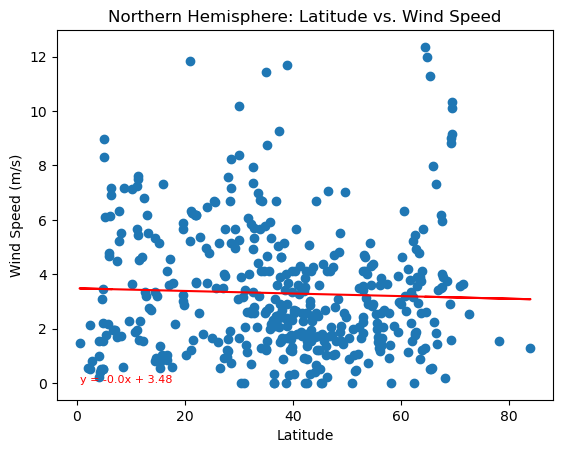

In [31]:
# Northern Hemisphere
lin_reg_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 'Northern Hemisphere: Latitude vs. Wind Speed')

The r-squared is: 0.11583693486126125


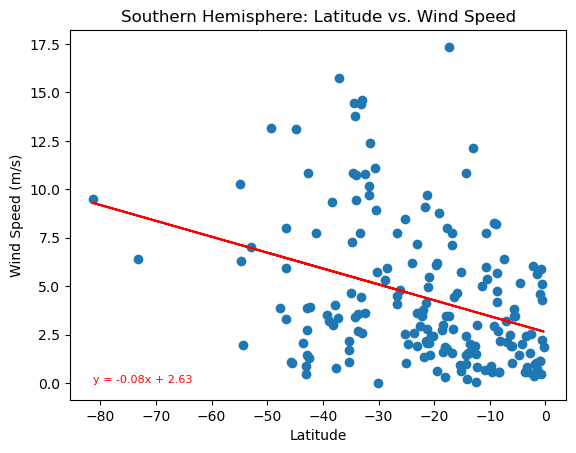

In [32]:
# Southern Hemisphere
lin_reg_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 'Southern Hemisphere: Latitude vs. Wind Speed')

**Discussion about the linear relationship:** The linear relationship between latitude and wind speed is quite weak. Latitiude doesn't seem to be a good indicator of wind speed based on the low r-squared values. It can also be seen on the scatter plot that the points are not centered or close to the regression lines.